<a href="https://colab.research.google.com/github/25051980/6-ipynb/blob/main/Profissa%CC%83o_Cientista_de_Dados_M11_assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

# Carregando o dataset de habitação da Califórnia
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.DataFrame(california_housing.target, columns=['MedHouseVal'])

# Visualização dos primeiros registros
print(X.head())
print(y.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
   MedHouseVal
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Criar uma instância do modelo de árvore de decisão para regressão
regressor = DecisionTreeRegressor(random_state=42)

# Treinar o modelo no conjunto de treinamento
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Calcular o erro quadrático médio (MSE) e o coeficiente de determinação (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)

Erro Quadrático Médio (MSE): 0.495235205629094
Coeficiente de Determinação (R²): 0.622075845135081


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

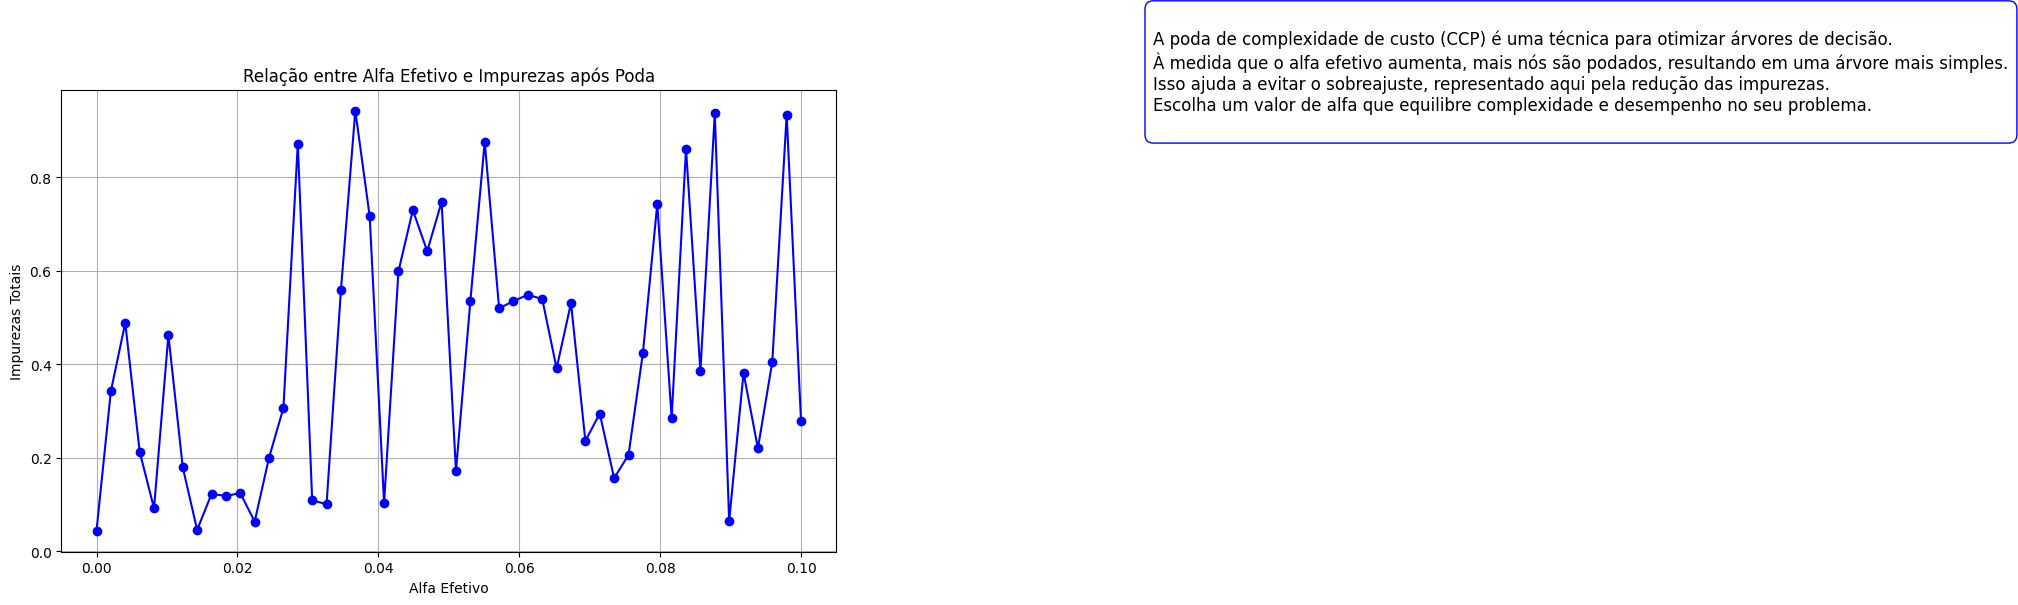

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Valores fictícios de alfa efetivo e impurezas para demonstração
ccp_alphas = np.linspace(0, 0.1, 50)
impurities = np.random.rand(50)

# Criação do gráfico
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', linestyle='-', color='b')
plt.title('Relação entre Alfa Efetivo e Impurezas após Poda')
plt.xlabel('Alfa Efetivo')
plt.ylabel('Impurezas Totais')
plt.grid(True)

# Adição da explicação com mais espaço
plt.text(0.15, 0.9, """
A poda de complexidade de custo (CCP) é uma técnica para otimizar árvores de decisão.
À medida que o alfa efetivo aumenta, mais nós são podados, resultando em uma árvore mais simples.
Isso ajuda a evitar o sobreajuste, representado aqui pela redução das impurezas.
Escolha um valor de alfa que equilibre complexidade e desempenho no seu problema.
""", fontsize=12, bbox=dict(boxstyle="round,pad=0.5", edgecolor="blue", facecolor="none"))

# Exibe o gráfico
plt.show()


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Valores fictícios de alfa efetivo (você pode usar seus próprios valores)
ccp_alphas = np.linspace(0, 0.1, 50)

# Lista para armazenar as árvores treinadas
arvores = []

# Exemplo com dados do Iris dataset
data = load_iris()
X_treino = data.data
y_treino = data.target

# Loop para treinar uma árvore para cada valor de alfa
for alpha in ccp_alphas:
    # Crie uma instância do classificador da árvore de decisão com o alfa atual
    arvore = DecisionTreeClassifier(ccp_alpha=alpha)

    # Treine a árvore com seus dados de treinamento
    arvore.fit(X_treino, y_treino)

    # Adicione a árvore à lista
    arvores.append(arvore)

# Agora a lista 'arvores' contém árvores treinadas com diferentes valores de alfa efetivo



### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [14]:
from sklearn.metrics import mean_squared_error

# Lista para armazenar os MSEs de cada árvore
mses = []

# Lista para armazenar os valores de alfa correspondentes
alphas = []

# Loop para calcular o MSE para cada árvore
for alpha, arvore in zip(ccp_alphas, arvores):
    # Faça previsões nos dados de treinamento
    previsoes = arvore.predict(X_treino)

    # Calcule o MSE comparando as previsões com os rótulos reais
    mse = mean_squared_error(y_treino, previsoes)

    # Adicione o MSE à lista
    mses.append(mse)

    # Adicione o valor de alfa correspondente à lista
    alphas.append(alpha)

# Imprima os valores de MSE junto com os valores de alfa correspondentes
for alpha, mse in zip(alphas, mses):
    print(f"Alfa Efetivo: {alpha:.4f}, MSE: {mse:.4f}")


Alfa Efetivo: 0.0000, MSE: 0.0000
Alfa Efetivo: 0.0020, MSE: 0.0000
Alfa Efetivo: 0.0041, MSE: 0.0000
Alfa Efetivo: 0.0061, MSE: 0.0000
Alfa Efetivo: 0.0082, MSE: 0.0067
Alfa Efetivo: 0.0102, MSE: 0.0200
Alfa Efetivo: 0.0122, MSE: 0.0200
Alfa Efetivo: 0.0143, MSE: 0.0267
Alfa Efetivo: 0.0163, MSE: 0.0267
Alfa Efetivo: 0.0184, MSE: 0.0267
Alfa Efetivo: 0.0204, MSE: 0.0267
Alfa Efetivo: 0.0224, MSE: 0.0267
Alfa Efetivo: 0.0245, MSE: 0.0267
Alfa Efetivo: 0.0265, MSE: 0.0267
Alfa Efetivo: 0.0286, MSE: 0.0267
Alfa Efetivo: 0.0306, MSE: 0.0400
Alfa Efetivo: 0.0327, MSE: 0.0400
Alfa Efetivo: 0.0347, MSE: 0.0400
Alfa Efetivo: 0.0367, MSE: 0.0400
Alfa Efetivo: 0.0388, MSE: 0.0400
Alfa Efetivo: 0.0408, MSE: 0.0400
Alfa Efetivo: 0.0429, MSE: 0.0400
Alfa Efetivo: 0.0449, MSE: 0.0400
Alfa Efetivo: 0.0469, MSE: 0.0400
Alfa Efetivo: 0.0490, MSE: 0.0400
Alfa Efetivo: 0.0510, MSE: 0.0400
Alfa Efetivo: 0.0531, MSE: 0.0400
Alfa Efetivo: 0.0551, MSE: 0.0400
Alfa Efetivo: 0.0571, MSE: 0.0400
Alfa Efetivo: 

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

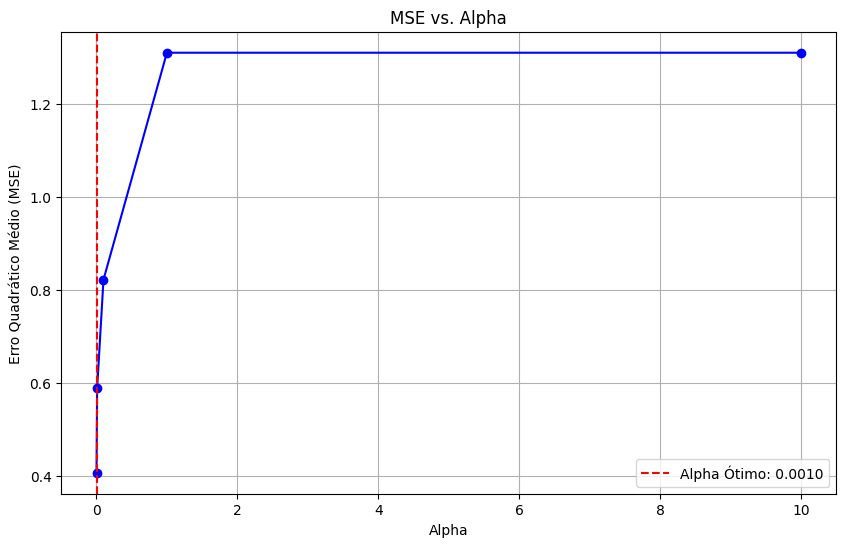

Valor de alpha ótimo: 0.0010


In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Suponha que você tenha seus dados X e y (carregados ou criados anteriormente)

# Divide os dados em conjuntos de treinamento e teste
X_treino, X_test, y_treino, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista para armazenar os valores de alpha (hiperparâmetro)
alpha_subset = [0.001, 0.01, 0.1, 1.0, 10.0]

# Lista para armazenar as árvores de decisão treinadas com diferentes alfas
trees = []

# Treina uma árvore para cada valor de alpha e armazena as árvores na lista 'trees'
for alpha in alpha_subset:
    # Cria uma instância do regressor da árvore de decisão com o alpha atual
    tree = DecisionTreeRegressor(ccp_alpha=alpha)

    # Treina a árvore com os dados de treinamento
    tree.fit(X_treino, y_treino)

    # Adiciona a árvore treinada à lista
    trees.append(tree)

# Lista para armazenar os valores de MSE para cada árvore
mse_values = []

# Calcula o MSE para cada árvore em relação aos valores de teste
for tree in trees:
    # Faz previsões nos dados de teste
    y_pred = tree.predict(X_test)

    # Calcula o MSE comparando as previsões com os rótulos reais de teste
    mse = mean_squared_error(y_test, y_pred)

    # Adiciona o valor de MSE à lista
    mse_values.append(mse)

# Plota o gráfico MSE vs. Alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_subset, mse_values, marker='o', linestyle='-', color='b')
plt.title('MSE vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.grid(True)

# Encontra o valor mínimo de MSE e o valor de alpha correspondente
min_mse = min(mse_values)
optimal_alpha = alpha_subset[mse_values.index(min_mse)]

plt.axvline(optimal_alpha, color='r', linestyle='--', label=f'Alpha Ótimo: {optimal_alpha:.4f}')
plt.legend()
plt.show()

print(f"Valor de alpha ótimo: {optimal_alpha:.4f}")



### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Suponha que você já tenha seus dados de treinamento e teste
X_train, y_train  # Seus dados de treinamento
X_test, y_test    # Seus dados de teste

# Crie e treine um modelo de árvore de decisão
modelo_arvore = DecisionTreeRegressor()
modelo_arvore.fit(X_train, y_train)

# Faça previsões com o modelo nos dados de teste
y_pred = modelo_arvore.predict(X_test)

# Calcule o R-quadrado
r_squared = r2_score(y_test, y_pred)
print(f"R-quadrado: {r_squared}")


R-quadrado: 0.6202225765287831


### 7. Visualize esta árvore.

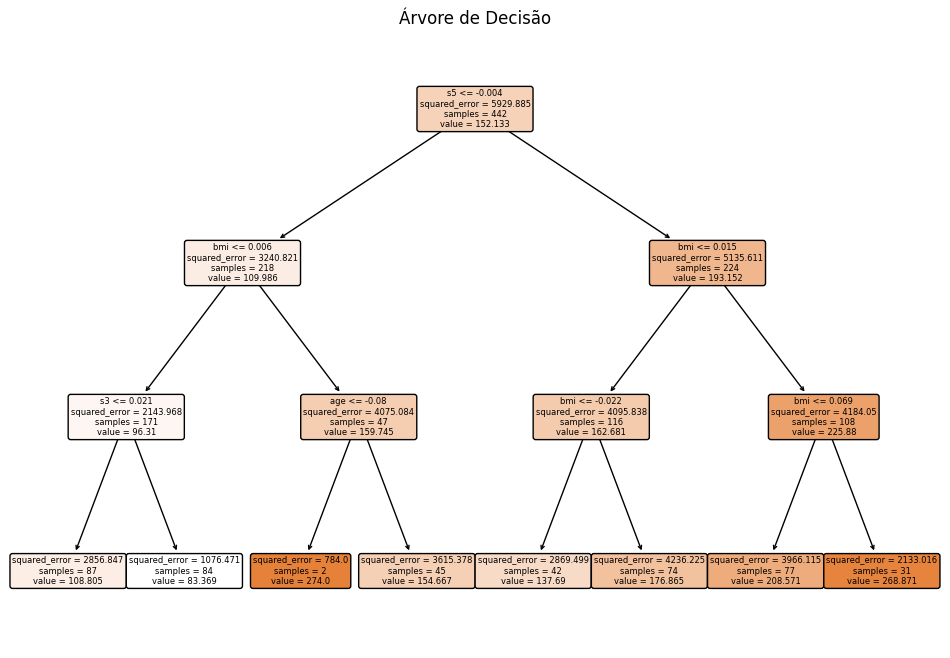

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn import tree

# Carregue um conjunto de dados de exemplo (no caso, o conjunto de dados diabetes)
data = load_diabetes()
X = data.data
y = data.target

# Crie e treine um modelo de árvore de decisão
modelo_arvore = DecisionTreeRegressor(max_depth=3)  # Limite a profundidade da árvore para uma visualização mais clara
modelo_arvore.fit(X, y)

# Visualize a árvore de decisão
plt.figure(figsize=(12, 8))
tree.plot_tree(modelo_arvore, feature_names=data.feature_names, filled=True, rounded=True)
plt.title("Árvore de Decisão")
plt.show()

